<a href="https://colab.research.google.com/github/Rizwans-github/Machine-Learning/blob/main/Improved%20_Housing_Prediction_with_RandomTreeRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [43]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [44]:
!kaggle competitions download -c home-data-for-ml-course

home-data-for-ml-course.zip: Skipping, found more recently modified local copy (use --force to force download)


In [45]:
!unzip home-data-for-ml-course.zip

Archive:  home-data-for-ml-course.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: sample_submission.csv.gz  
  inflating: test.csv                
  inflating: test.csv.gz             
  inflating: train.csv               
  inflating: train.csv.gz            


In [46]:
Data = pd.read_csv('train.csv')

In [47]:
Data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [48]:
Data.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


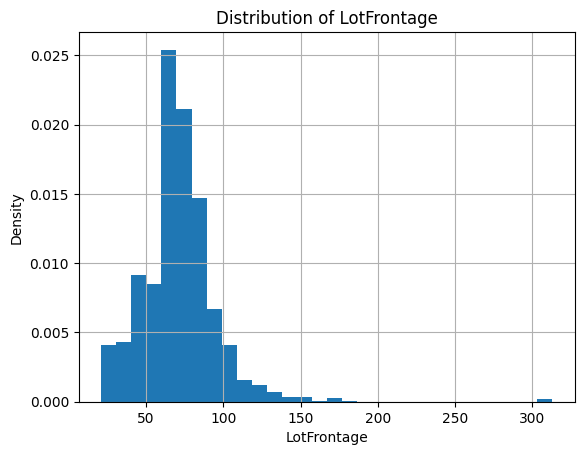

In [49]:
Data.LotFrontage.hist(bins= 30, density=True)
plt.xlabel('LotFrontage')
plt.ylabel('Density')
plt.title('Distribution of LotFrontage')
plt.show()

In [50]:
print(Data.LotFrontage.median())
Impute_val = Data.LotFrontage.median()

69.0


In [51]:
med_data = Data.copy()
med_data.LotFrontage.fillna(Impute_val, inplace=True)

/tmp/ipython-input-3860697939.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  med_data.LotFrontage.fillna(Impute_val, inplace=True)


In [52]:
med_data.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [53]:
Data.LotFrontage.isnull().sum()

np.int64(259)

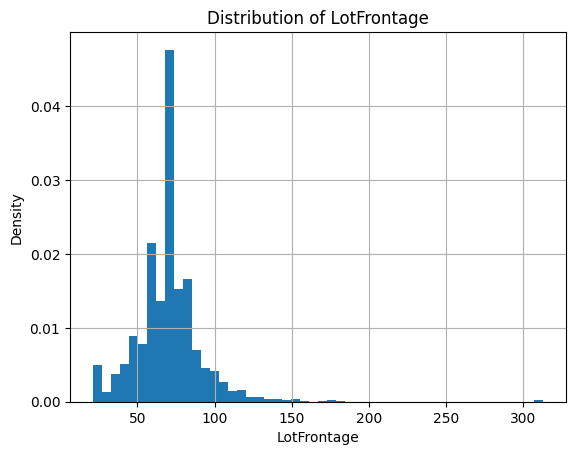

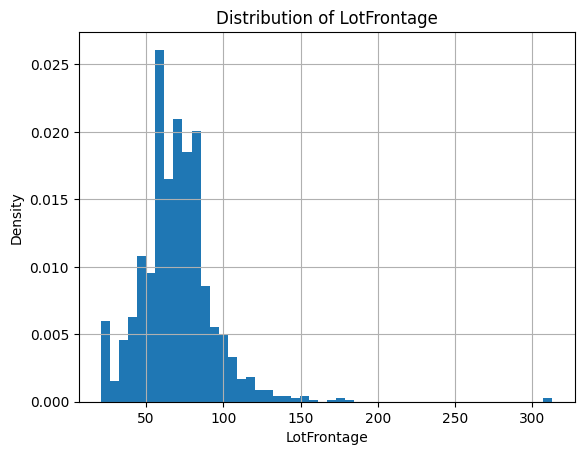

In [54]:
med_data.LotFrontage.hist(bins= 50, density=True)
plt.xlabel('LotFrontage')
plt.ylabel('Density')
plt.title('Distribution of LotFrontage')
plt.show()
Data.LotFrontage.hist(bins= 50, density=True)
plt.xlabel('LotFrontage')
plt.ylabel('Density')
plt.title('Distribution of LotFrontage')
plt.show()

In [55]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
numerical_cols = Data.select_dtypes(include=np.number).columns
knn_data = pd.DataFrame(knn_imputer.fit_transform(Data[numerical_cols]), columns=numerical_cols)
print("Missing values after KNN imputation:")
print(knn_data.isnull().sum().sum())

Missing values after KNN imputation:
0


In [56]:
missing_lotfrontage_indices = Data[Data['LotFrontage'].isnull()].index
display(pd.DataFrame({
    'Original_LotFrontage': Data.loc[missing_lotfrontage_indices, 'LotFrontage'],
    'KNN_Imputed_LotFrontage': knn_data.loc[missing_lotfrontage_indices, 'LotFrontage']
}))

,Original_LotFrontage,KNN_Imputed_LotFrontage
7,NaN,75.6
12,NaN,76.6
14,NaN,75.2
16,NaN,90.2
24,NaN,66.0
...,...,...
1429,NaN,80.2
1431,NaN,52.6
1441,NaN,34.2
1443,NaN,60.2


In [57]:
knn_data.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0


In [58]:
knn_data.LotFrontage.isnull().sum()

np.int64(0)

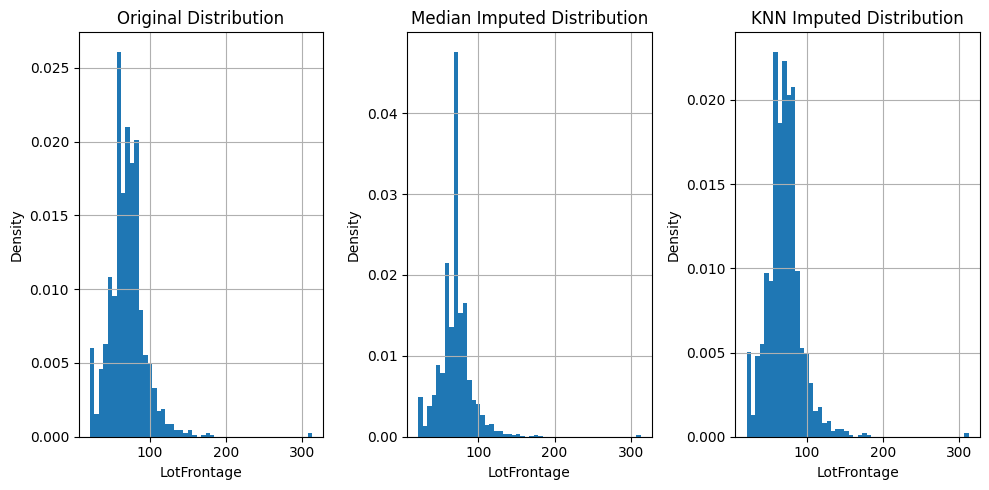

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# Original Data
Data.LotFrontage.hist(bins=50, density=True, ax=axes[0])
axes[0].set_xlabel('LotFrontage')
axes[0].set_ylabel('Density')
axes[0].set_title('Original Distribution')

# Median Imputed Data
med_data.LotFrontage.hist(bins=50, density=True, ax=axes[1])
axes[1].set_xlabel('LotFrontage')
axes[1].set_ylabel('Density')
axes[1].set_title('Median Imputed Distribution')

# KNN Imputed Data
knn_data.LotFrontage.hist(bins=50, density=True, ax=axes[2])
axes[2].set_xlabel('LotFrontage')
axes[2].set_ylabel('Density')
axes[2].set_title('KNN Imputed Distribution')

plt.tight_layout()
plt.show()

In [60]:
X = knn_data.drop(['SalePrice'], axis=1)
y = knn_data['SalePrice']
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
display(X.head())
y.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0


In [62]:
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
  model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state=2)
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  mae = mean_absolute_error(y_test, predictions)
  return mae

In [63]:
max_leaf_nodes = [5, 25, 50, 100, 250, 500]
mae = {}
for node in max_leaf_nodes:
  mae[node] = get_mae(node, X_train, X_test, y_train, y_test)

best_tree = min(mae, key=mae.get)

mae_df = pd.DataFrame(list(mae.items()), columns=['Nodes', 'MAE'])
mae_df['MAE'] = mae_df['MAE'].round(2)
mae_df['MAE'].sort_values(ascending=True)
print(mae_df)

print(f"\nBest max_leaf_nodes: {best_tree} gives the least MAE of {mae[best_tree]}")

   Nodes       MAE
0      5  32578.31
1     25  27256.97
2     50  25326.52
3    100  25083.89
4    250  25688.11
5    500  26199.18

Best max_leaf_nodes: 100 gives the least MAE of 25083.88619470912


In [64]:
final_model = DecisionTreeRegressor(max_leaf_nodes = best_tree, random_state=2)
final_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=100, random_state=2)

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)
prediction = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, prediction)
print(f"Mean Absolute Error: {rf_mae}")

Mean Absolute Error: 18230.374965753424


In [66]:
print(f"MAE using Decision Tree: {mae[best_tree]}")
print(f"MAE using Random Forest: {rf_mae}")

MAE using Decision Tree: 25083.88619470912
MAE using Random Forest: 18230.374965753424


In [68]:
def get_rf_mae(max_depth, X_train, X_test, y_train, y_test):
  model = RandomForestRegressor(max_depth = max_depth, random_state=2)
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  rf_depth_mae = mean_absolute_error(y_test, predictions)
  return rf_depth_mae

In [77]:
rf_mae_result = {}
rf_depth = [5,10,15,20,25,30,None]
for depth in rf_depth:
  rf_mae_result[depth] = get_rf_mae(depth, X_train, X_test, y_train, y_test)
best_rf_mae = min(rf_mae_result, key=rf_mae_result.get)

print(f"Best depth for Random Forest Regressor is {best_rf_mae} as it has the least MAE of {rf_mae_result[best_rf_mae]}")

Best depth for Random Forest Regressor is 20 as it has the least MAE of 18163.869648226395


In [75]:
best_model = RandomForestRegressor(max_depth = best_rf_mae, random_state=2)
best_model.fit(X, y)

RandomForestRegressor(max_depth=20, random_state=2)